# Data Visualization
### Final Project | PH 464

Sift through Hamidieh's data and visualize.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sb; sb.set()

Import data from the pickle we saved in `convert-data.ipynb`.

In [11]:
from os import path

FILES = ['element_data.pkl', 'train.pkl', 'unique_m.pkl']
for i, fi in enumerate(FILES):
    FILES[i] = path.abspath(path.join('pickle', fi))
    
DATA = {}

for f in FILES:
    DATA.update({str(path.splitext(path.basename(f))[0]) : pd.read_pickle(f)})

Sets to explore:

In [12]:
DATA.keys()

['train', 'element_data', 'unique_m']

## Train Set

In [13]:
print DATA['train'].shape
DATA['train'].head()

(21263, 82)


,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
1,4.0,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1.0,1.085714,0.433013,0.437059,29.0
2,5.0,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2.0,1.128571,0.632456,0.468606,26.0
3,4.0,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1.0,1.114286,0.433013,0.444697,19.0
4,4.0,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1.0,1.100000,0.433013,0.440952,22.0
5,4.0,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1.0,1.057143,0.433013,0.428809,23.0


In [14]:
for c in DATA['train'].columns:
    print c

number_of_elements
mean_atomic_mass
wtd_mean_atomic_mass
gmean_atomic_mass
wtd_gmean_atomic_mass
entropy_atomic_mass
wtd_entropy_atomic_mass
range_atomic_mass
wtd_range_atomic_mass
std_atomic_mass
wtd_std_atomic_mass
mean_fie
wtd_mean_fie
gmean_fie
wtd_gmean_fie
entropy_fie
wtd_entropy_fie
range_fie
wtd_range_fie
std_fie
wtd_std_fie
mean_atomic_radius
wtd_mean_atomic_radius
gmean_atomic_radius
wtd_gmean_atomic_radius
entropy_atomic_radius
wtd_entropy_atomic_radius
range_atomic_radius
wtd_range_atomic_radius
std_atomic_radius
wtd_std_atomic_radius
mean_Density
wtd_mean_Density
gmean_Density
wtd_gmean_Density
entropy_Density
wtd_entropy_Density
range_Density
wtd_range_Density
std_Density
wtd_std_Density
mean_ElectronAffinity
wtd_mean_ElectronAffinity
gmean_ElectronAffinity
wtd_gmean_ElectronAffinity
entropy_ElectronAffinity
wtd_entropy_ElectronAffinity
range_ElectronAffinity
wtd_range_ElectronAffinity
std_ElectronAffinity
wtd_std_ElectronAffinity
mean_FusionHeat
wtd_mean_FusionHeat
gmean

This set contains a TON of data about each sample. There is another set I ignored initially called `subset_element_data` which might actually be useful for not overloading me.

Let's split take a copy of this dataset and try to take a broad look at it.

In [15]:
train = DATA['train']

train_means = []

for k in train.columns:
    if ("mean" in k) and ("wtd_mean" not in k) and ("gmean" not in k): train_means.append(k)

train_means.append("number_of_elements")
        
Xtrain = train.filter(train_means, axis=1)
ytrain = train.critical_temp

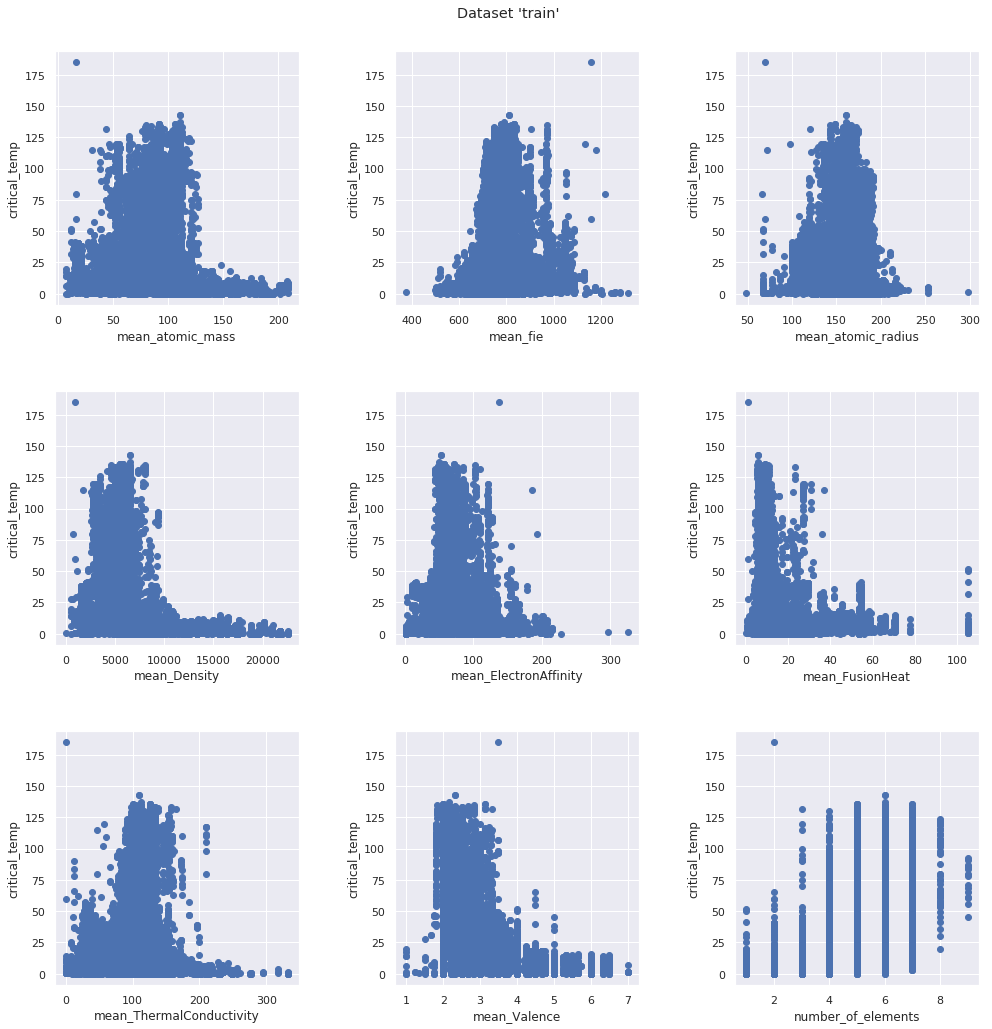

In [21]:
train_fig, train_ax = plt.subplots(Xtrain.columns.size / 3, 3, figsize = (15, 15))
train_fig.tight_layout(pad = 5)
train_fig.suptitle("Dataset 'train'")

for i, axi in enumerate(train_ax.ravel()):
    axi.scatter(Xtrain.iloc[:, i], ytrain)
    axi.set_xlabel(Xtrain.columns[i])
    axi.set_ylabel(ytrain.name)

## Unique_m

In [17]:
print DATA['unique_m'].shape
DATA['unique_m'].head()

(21263, 88)


,H,He,Li,Be,B,C,N,O,F,Ne,...,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp,material
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0,Ba0.2La1.8Cu1O4
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0,Ba0.1La1.9Ag0.1Cu0.9O4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,Ba0.1La1.9Cu1O4
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,Ba0.15La1.85Cu1O4
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,Ba0.3La1.7Cu1O4


In [18]:
DATA['unique_m'].columns

Index([u'H', u'He', u'Li', u'Be', u'B', u'C', u'N', u'O', u'F', u'Ne', u'Na',
       u'Mg', u'Al', u'Si', u'P', u'S', u'Cl', u'Ar', u'K', u'Ca', u'Sc',
       u'Ti', u'V', u'Cr', u'Mn', u'Fe', u'Co', u'Ni', u'Cu', u'Zn', u'Ga',
       u'Ge', u'As', u'Se', u'Br', u'Kr', u'Rb', u'Sr', u'Y', u'Zr', u'Nb',
       u'Mo', u'Tc', u'Ru', u'Rh', u'Pd', u'Ag', u'Cd', u'In', u'Sn', u'Sb',
       u'Te', u'I', u'Xe', u'Cs', u'Ba', u'La', u'Ce', u'Pr', u'Nd', u'Pm',
       u'Sm', u'Eu', u'Gd', u'Tb', u'Dy', u'Ho', u'Er', u'Tm', u'Yb', u'Lu',
       u'Hf', u'Ta', u'W', u'Re', u'Os', u'Ir', u'Pt', u'Au', u'Hg', u'Tl',
       u'Pb', u'Bi', u'Po', u'At', u'Rn', u'critical_temp', u'material'],
      dtype='object')

This set appears to be a list of critical temperatures for unique materials, including the composition of each material.

In [23]:
unique_m = DATA['unique_m']
yun_m = unique_m['critical_temp']

unique_m = unique_m.drop(columns=[
    'critical_temp', 'material'
])

Xun_m = unique_m

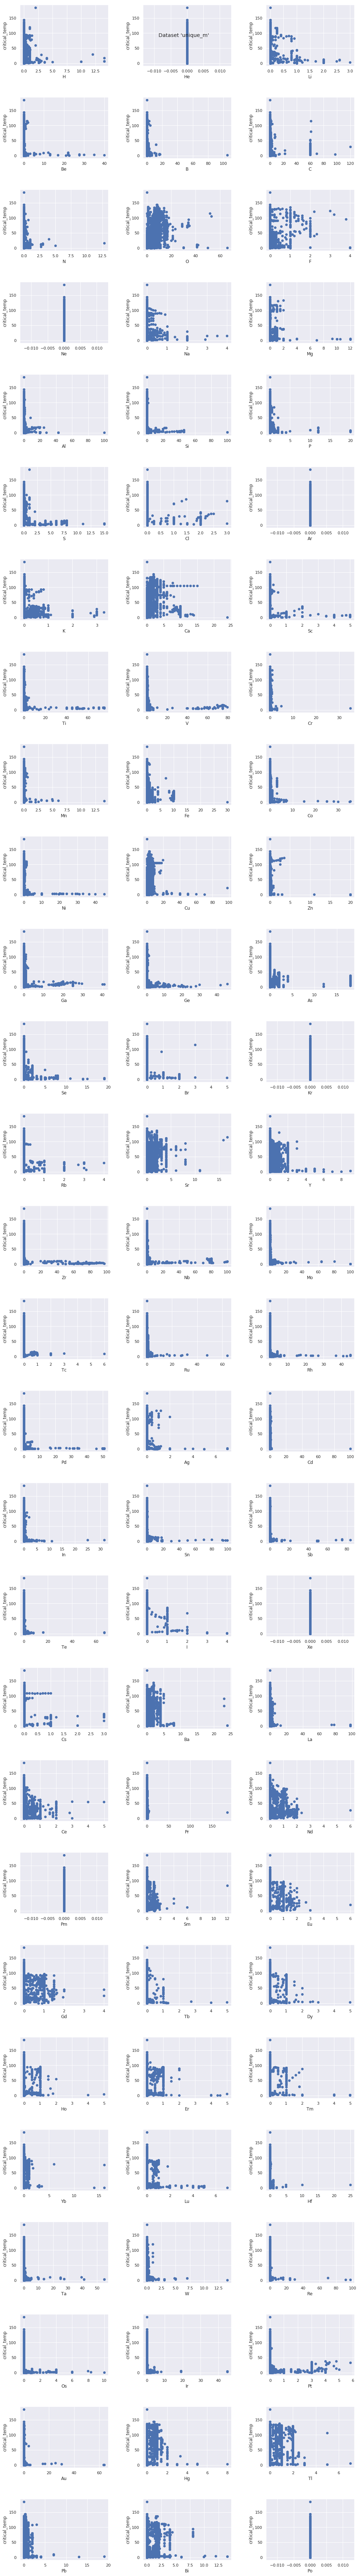

In [31]:
# This plot needs some work
unm_fig, unm_ax = plt.subplots(Xun_m.columns.size / 3, 3, figsize = (15, 100))
unm_fig.tight_layout(pad = 5)
unm_fig.suptitle("Dataset 'unique_m'")

for i, axi in enumerate(unm_ax.ravel()):
    axi.scatter(Xun_m.iloc[:, i], yun_m)
    axi.set_xlabel(Xun_m.columns[i])
    axi.set_ylabel(yun_m.name)